In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1Tgb3xCiND20Unzljwws51CrYskTJQLwj'}) # replace the id with id of file you want to access
downloaded.GetContentFile('dataset.csv')

### Loading Libraries:

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

In [67]:
df=pd.read_csv("dataset.csv")
df.head()

,Unique Id,Image,Brand,Title,Specifications,Highlights,Price,Rating
0,0697f1714bf848c4b1cacc39a46a4e8b,https://images-na.ssl-images-amazon.com/images...,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7
1,f04481fec10c4a538634d01e04bb45ed,https://images-na.ssl-images-amazon.com/images...,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0
2,754577bc25b24641ab1b0aef5e19db73,https://images-na.ssl-images-amazon.com/images...,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3
3,b4c5f6d192124d70919946ea754cce56,https://images-na.ssl-images-amazon.com/images...,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0
4,b1a1b9c3926b4da1ab0040ea81b41e3e,https://images-na.ssl-images-amazon.com/images...,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0


In [68]:
df.shape

(51500, 8)

In [69]:
df.columns

Index(['Unique Id', 'Image', 'Brand', 'Title', 'Specifications', 'Highlights',
       'Price', 'Rating'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 8 columns):
Unique Id         51500 non-null object
Image             47967 non-null object
Brand             51497 non-null object
Title             51499 non-null object
Specifications    51500 non-null object
Highlights        51498 non-null object
Price             51500 non-null object
Rating            51500 non-null float64
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


### Checking for Null values:

In [71]:
df.isnull().sum()

Unique Id            0
Image             3533
Brand                3
Title                1
Specifications       0
Highlights           2
Price                0
Rating               0
dtype: int64

In [0]:
df['Price'].replace({'not_available':0},inplace=True)

In [73]:
validate=df[df['Price']==0]
validate.shape

(3499, 8)

storing the price values of zero's instead of dropping or removing

In [74]:
df1=df[~(df['Price']==0)]
df1.shape

(48001, 8)

In [0]:
df1['Price']=df1['Price'].astype('float')

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48001 entries, 0 to 51499
Data columns (total 8 columns):
Unique Id         48001 non-null object
Image             44864 non-null object
Brand             47999 non-null object
Title             48000 non-null object
Specifications    48001 non-null object
Highlights        48000 non-null object
Price             48001 non-null float64
Rating            48001 non-null float64
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


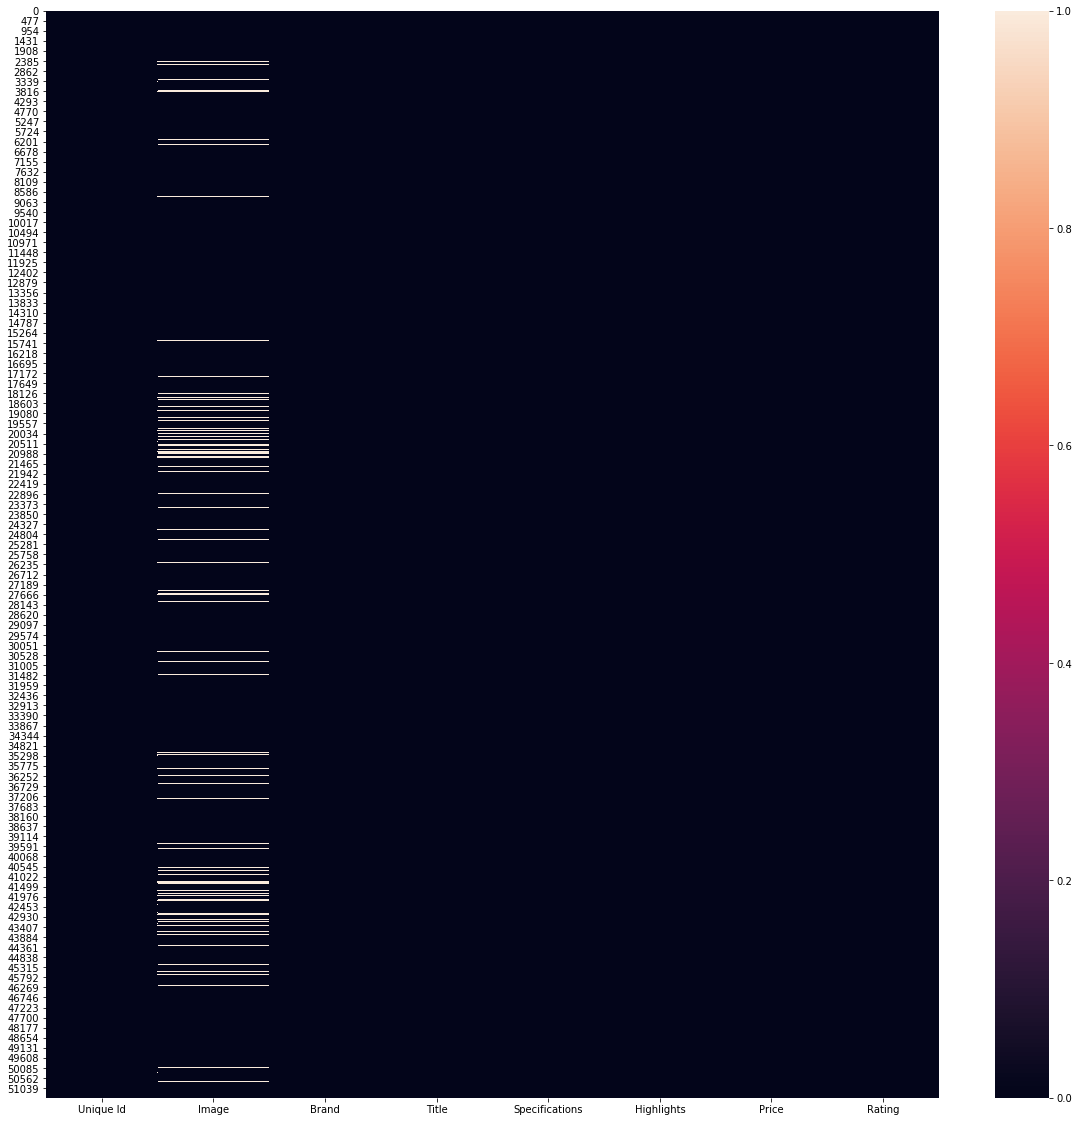

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

Checking for frequenct null values among rows by using heatmap and found that in images column there are null values.

In [78]:
print(validate.shape)
print(df1.shape)

(3499, 8)
(48001, 8)


In [79]:
df1.drop(['Image','Unique Id','Specifications'],axis=1,inplace=True)
df1.head()

,Brand,Title,Highlights,Price,Rating
0,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,Make sure this fits by entering your model num...,12.99,4.7
1,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,"Material: Made of elastic synthetic cotton, so...",9.99,5.0
2,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,Make sure this fits by entering your model num...,379.18,3.3
3,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,Make sure this fits by entering your model num...,19.97,5.0
4,GBTIGER,"120 inch Portable Projection Screen with Bag, ...",Make sure this fits by entering your model num...,27.99,3.0


In [80]:
df1.isnull().sum()

Brand         2
Title         1
Highlights    1
Price         0
Rating        0
dtype: int64

In [0]:
df1.dropna(inplace=True)

### PRICE

In [82]:
df1['Price'].describe()

count    47997.000000
mean        57.692697
std        224.295100
min          0.010000
25%         11.500000
50%         19.930000
75%         40.210000
max      16239.030000
Name: Price, dtype: float64

In [0]:
price_comparision=[]
for i in df1['Price']:
  if(i<=20):
    price_comparision.append("Low")
  elif(i<=41):
    price_comparision.append("Medium")
  else:
    price_comparision.append("High")

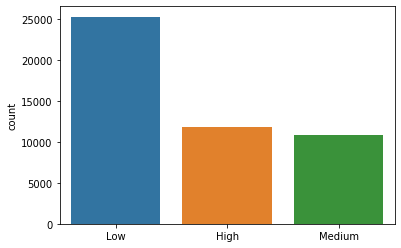

In [84]:
sns.countplot(price_comparision)

Low priced item are more when compared to high and medium priced item. Shayak selling having 52.6 % of low priced items, medium and high items products equally.

Text(0.5, 1.0, 'Price Distribution')

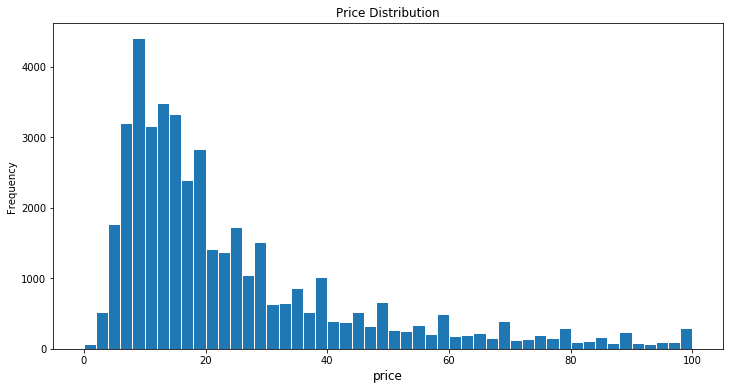

In [85]:
(df1['Price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 100])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)


The price of items are left skewed, vast majority of items priced at 10-20. However the highest priced item is at 16239.

Text(0.5, 1.0, 'Price Distribution')

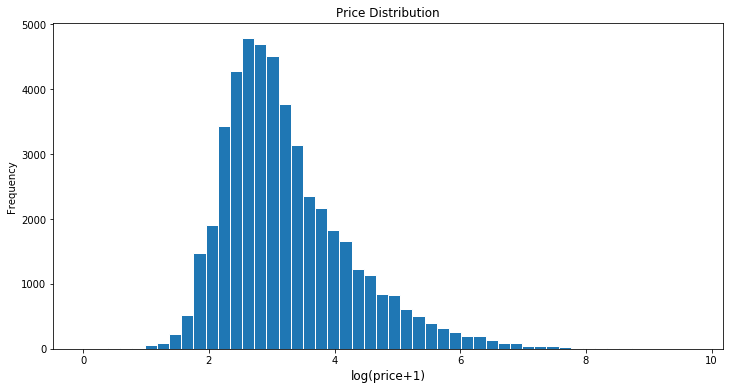

In [86]:
import numpy as np
np.log(df1['Price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

Due to skewness, applied log transformation on price

Text(0.5, 1.0, 'Rating Distribution')

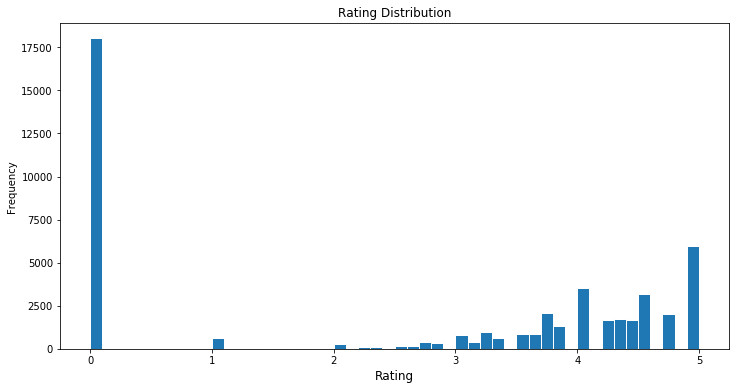

In [87]:
(df1['Rating']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white')
plt.xlabel('Rating', fontsize=12)
plt.title('Rating Distribution', fontsize=12)

Around 17500 products are with the zero rating. Other rating for the product are less in count.

In [0]:
df1['price_comparision']=price_comparision

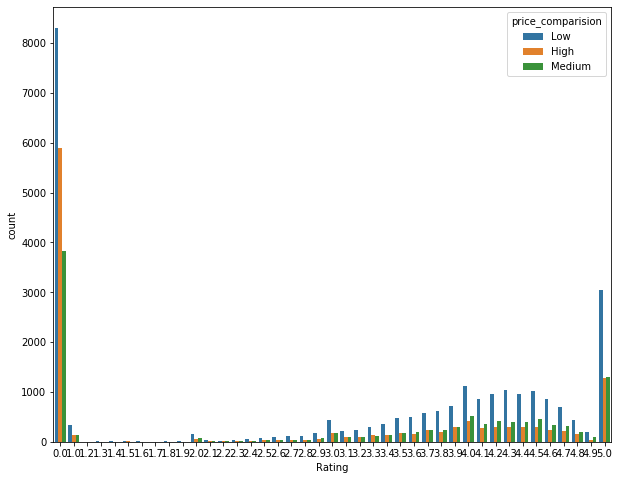

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(df1['Rating'],hue=df1['price_comparision'])

Among overall Rating given to the items, the 0 rating item have all the three priced items and low priced items are more under the ratings 0 and 5 compared to other priced items.

In [90]:
df1.columns

Index(['Brand', 'Title', 'Highlights', 'Price', 'Rating', 'price_comparision'], dtype='object')

Removing the values which containing "not_available" in Highlights, title, brand columns

In [0]:
df1.drop(['Highlights'],axis=1,inplace=True)

In [0]:
df2=df1[~(df1['Title']=='not_available')]

In [93]:
df2.columns

Index(['Brand', 'Title', 'Price', 'Rating', 'price_comparision'], dtype='object')

In [0]:
df3=df2[~(df2['Brand']=='not_available')]

In [95]:
df3.shape

(47928, 5)

In [96]:
df3.head()

,Brand,Title,Price,Rating,price_comparision
0,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,12.99,4.7,Low
1,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,9.99,5.0,Low
2,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,379.18,3.3,High
3,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,19.97,5.0,Low
4,GBTIGER,"120 inch Portable Projection Screen with Bag, ...",27.99,3.0,Medium


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [0]:
from scipy.sparse import csr_matrix, hstack
import lightgbm as lgb

In [0]:
brand=[]
for i in df3['Brand']:
  brand.append(i.replace('/',''))


In [0]:
df3['brand']=brand

In [101]:
df3.brand.value_counts()

Nike              278
Under-Armour      236
uxcell            186
Disney            152
Columbia          143
                 ... 
25DOL               1
Minute Man          1
Discovery Kids      1
Elegance Linen      1
DOGOON              1
Name: brand, Length: 24434, dtype: int64

In [102]:
df3['Brand'].value_counts()

/Nike            243
/Under-Armour    236
uxcell           186
/Columbia        139
/PUMA            126
                ... 
KSZ TRADERS        1
Vaexheart          1
MeliMe             1
JPH                1
Imrue Beauty       1
Name: Brand, Length: 24509, dtype: int64

In [0]:
s=[]
for i in df3['brand']:
  j=i.split(":")
  if(j[0]=='https'):
    s.append(i)

In [104]:
len(s)

272

Here we have 272 links directly instead of Brand Names.

In [105]:
df3.columns

Index(['Brand', 'Title', 'Price', 'Rating', 'price_comparision', 'brand'], dtype='object')

In [0]:
tv = TfidfVectorizer( ngram_range=(1, 3), stop_words='english')
X_Title = tv.fit_transform(df3['Title'])

In [0]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(df3['brand'])

In [108]:
X_brand.shape

(47928, 24434)

In [0]:
import scipy
X_rating=scipy.sparse.csr_matrix(df3['Rating'])

In [0]:
import numpy 
X_Rating = numpy.transpose(X_rating)

### Model Building:

In [0]:
sparse = hstack((X_Title, X_brand,X_Rating)).tocsr()


In [0]:
y=df3['Price']

In [0]:
X_train,X_test,ytrain,ytest=train_test_split(sparse,y,test_size=0.2,random_state=42)

In [0]:
train_X = lgb.Dataset(X_train, ytrain)

In [0]:
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

In [0]:
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)

In [0]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [118]:
rmse=mean_squared_error(ytest, y_pred) ** 0.5
print('The rmse of prediction is:',rmse )

The rmse of prediction is: 208.50038482607926


In [119]:
r2=r2_score(ytest,y_pred)
print("The r2_score is: ",r2)

The r2_score is:  0.33546838814375946


Here without transforming of price values got an rmse value of 208.5 and r2 score 0.33.

Transforming the Price values:

In [0]:
log_y = np.log1p(df3["Price"])

In [121]:
X_train1,X_test1,ytrain1,ytest1=train_test_split(sparse,log_y,test_size=0.2,random_state=42)
train_X1 = lgb.Dataset(X_train1, ytrain1)
gbm = lgb.train(params, train_set=train_X1, num_boost_round=3200, verbose_eval=100)
y_pred1 = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse_log=mean_squared_error(ytest1, y_pred1) ** 0.5
print('The rmse of prediction is:',rmse_log )
print("The r2_score is: ",r2_score(ytest1,y_pred1))

The rmse of prediction is: 0.8920495523635127
The r2_score is:  0.2554033365826328


After Transforming the Price values in the dataset got an rmse of 0.89 and r2 score of 0.25

### Result:

In [122]:
pd.DataFrame({"lgbm":rmse,"lgbm_log":rmse_log},index=['RMSE'])

,lgbm,lgbm_log
RMSE,208.500385,0.89205


Without transforming the price values of an item got an rmse values of 208.5 and r2_score of 33% as the model of independent variable are able to predict 33% of the price of items correctly.

Where as after tranforming the price values of item got an rmse value of 0.89 and the model of independent variable are able to predict 25% of the price of items correctly 